In [361]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [454]:
df = pd.read_csv('bank1 - bank.csv.csv')

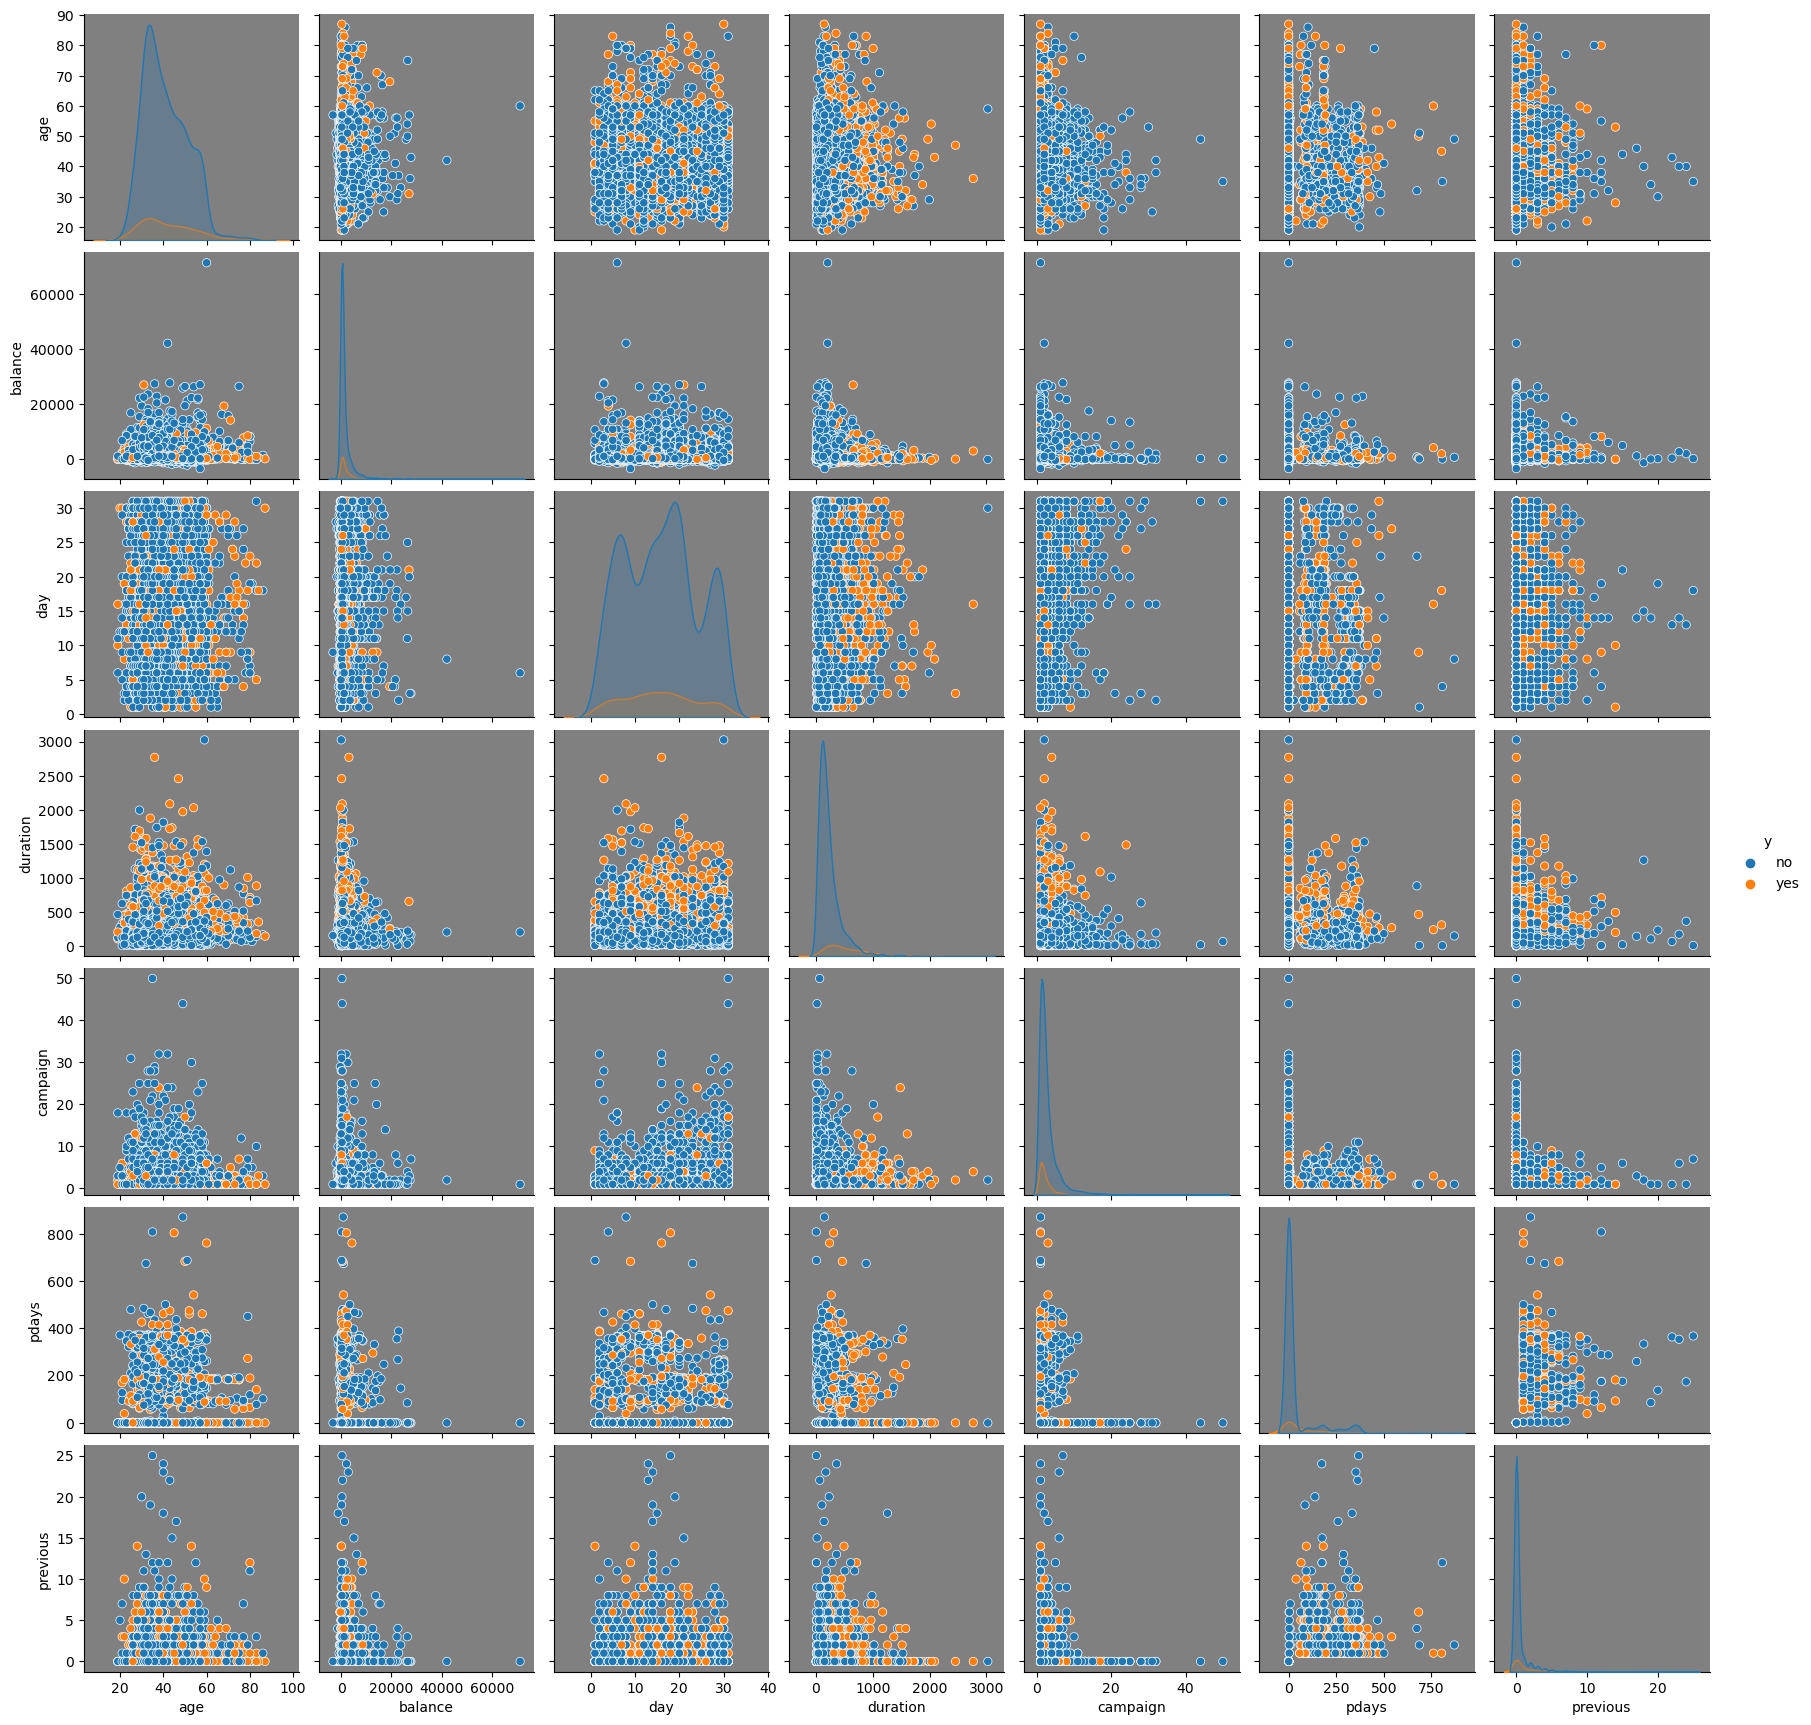

In [457]:
sns.pairplot(df,hue="y")

In [366]:
df.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [368]:
df.shape

(4521, 17)

In [369]:
df.describe()

age   balance      day  duration  campaign    pdays  previous
count 4,521.00  4,521.00 4,521.00  4,521.00  4,521.00 4,521.00  4,521.00
mean     41.17  1,422.66    15.92    263.96      2.79    39.77      0.54
std      10.58  3,009.64     8.25    259.86      3.11   100.12      1.69
min      19.00 -3,313.00     1.00      4.00      1.00    -1.00      0.00
25%      33.00     69.00     9.00    104.00      1.00    -1.00      0.00
50%      39.00    444.00    16.00    185.00      2.00    -1.00      0.00
75%      49.00  1,480.00    21.00    329.00      3.00    -1.00      0.00
max      87.00 71,188.00    31.00  3,025.00     50.00   871.00     25.00

In [388]:
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
marital
['married' 'single' 'divorced']
education
['primary' 'secondary' 'tertiary' 'unknown']
default
['no' 'yes']
housing
['no' 'yes']
loan
['no' 'yes']
contact
['cellular' 'unknown' 'telephone']
month
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
poutcome
['unknown' 'failure' 'other' 'success']
y
['no' 'yes']


In [389]:
features_na = [features for features in df.columns if df[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(df[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value")


No missing value


In [373]:
for column in df.columns:
    print(column,df[column].nunique())

age 67
job 12
marital 3
education 4
default 2
balance 2353
housing 2
loan 2
contact 3
day 31
month 12
duration 875
campaign 32
pdays 292
previous 24
poutcome 4
y 2


In [385]:
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O') & (feature not in ['y']))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [386]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 3
The feature is education and number of categories are 4
The feature is default and number of categories are 2
The feature is housing and number of categories are 2
The feature is loan and number of categories are 2
The feature is contact and number of categories are 3
The feature is month and number of categories are 12
The feature is poutcome and number of categories are 4


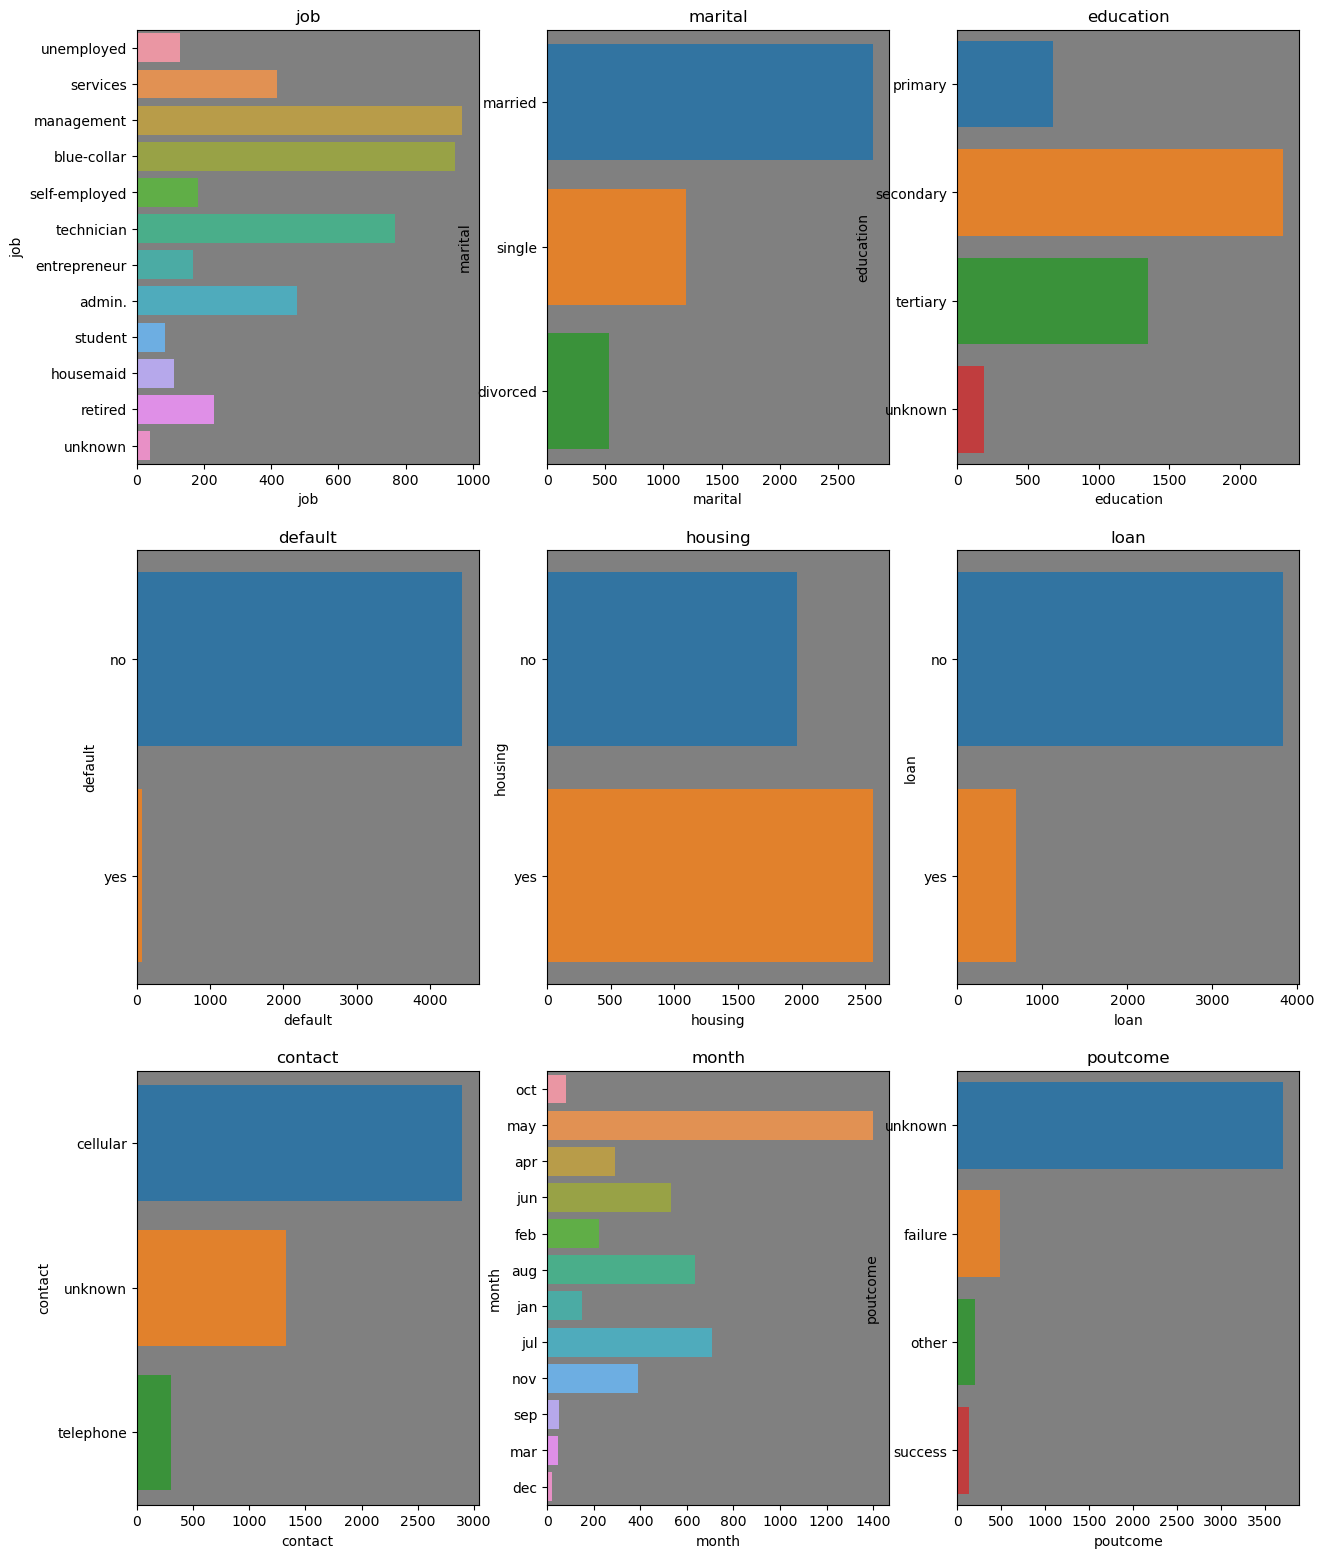

In [392]:
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

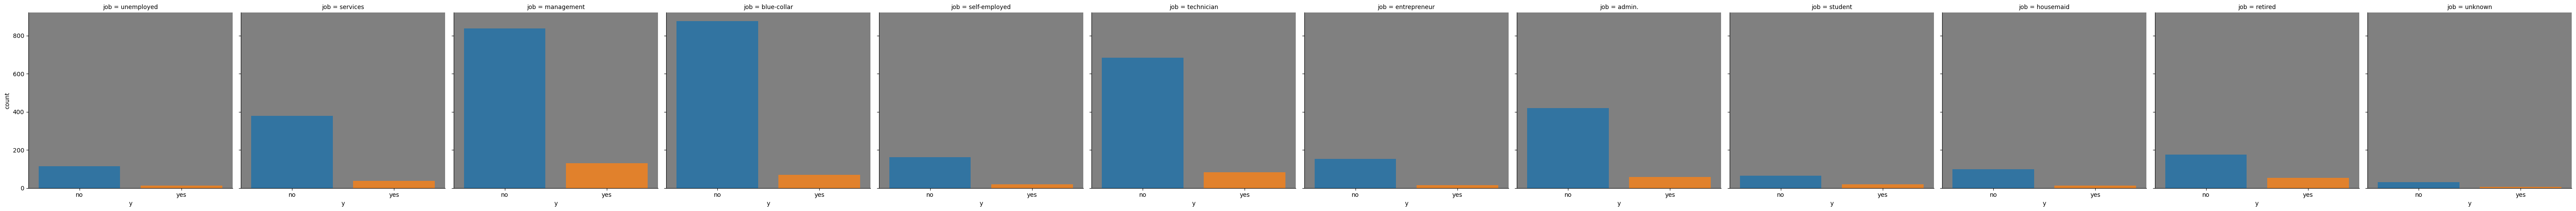

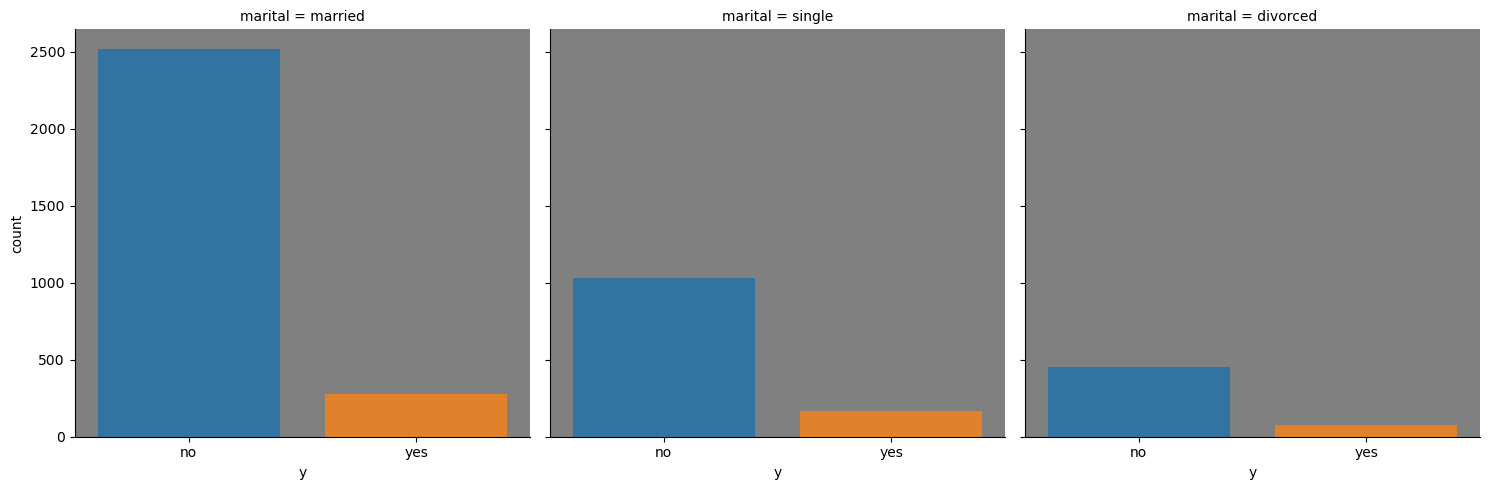

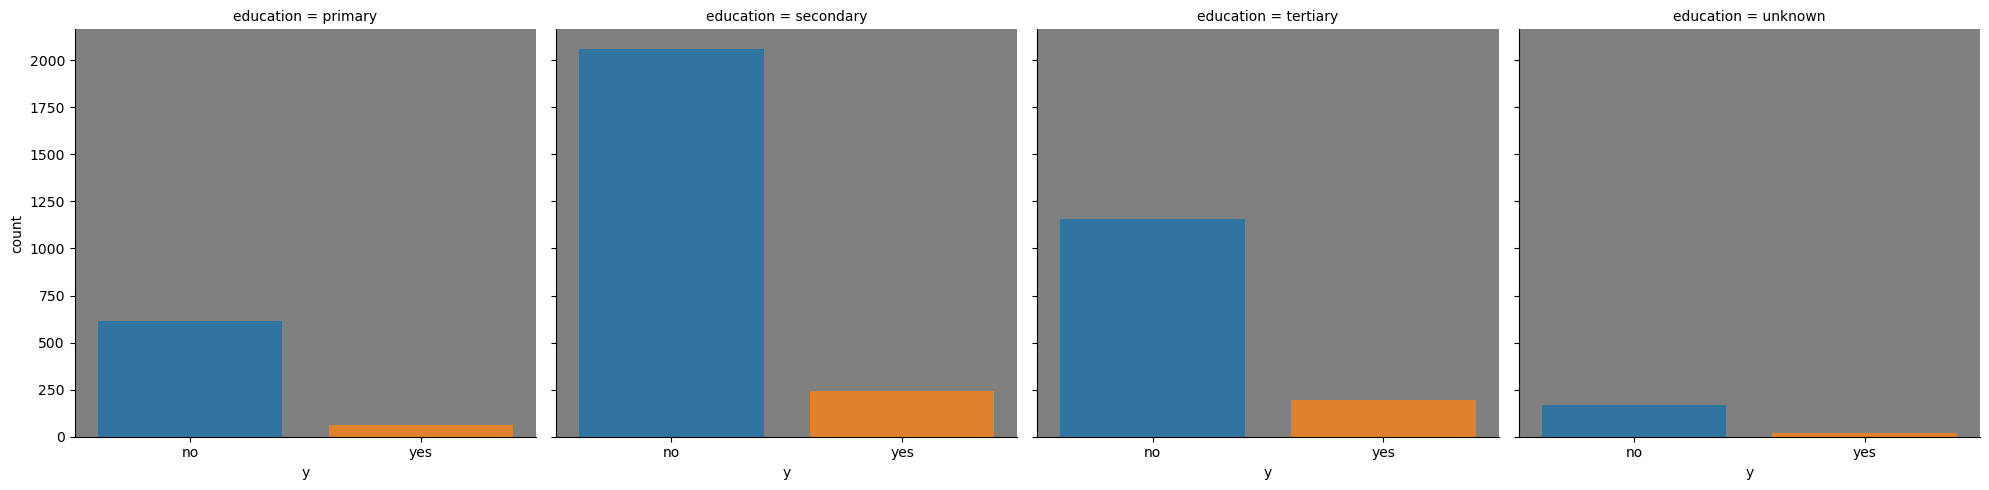

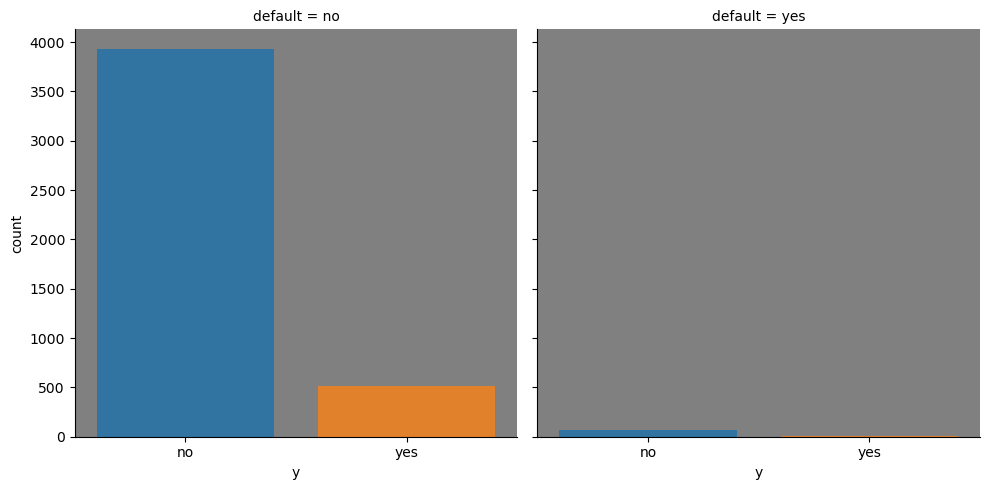

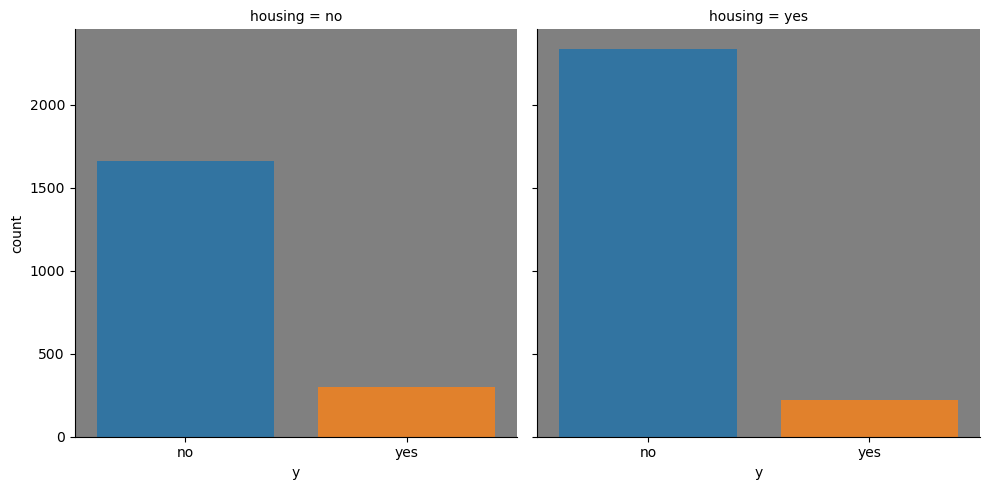

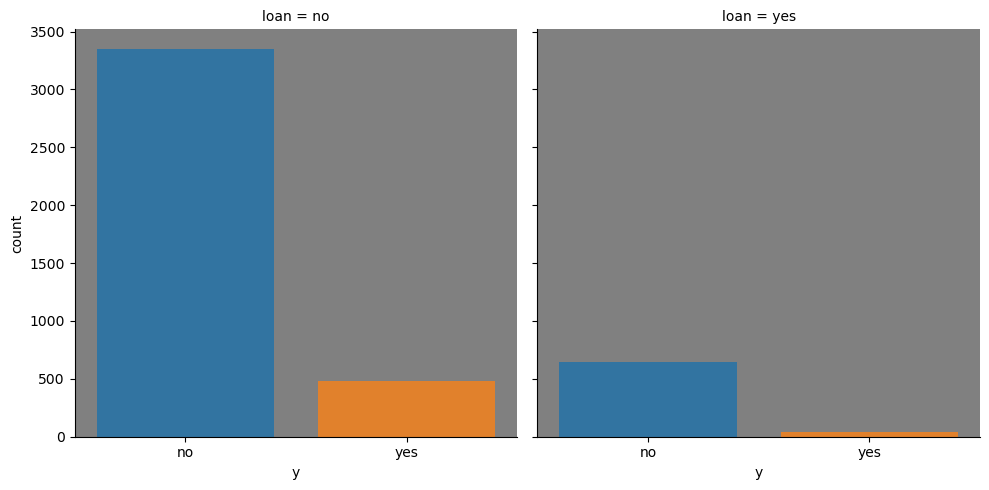

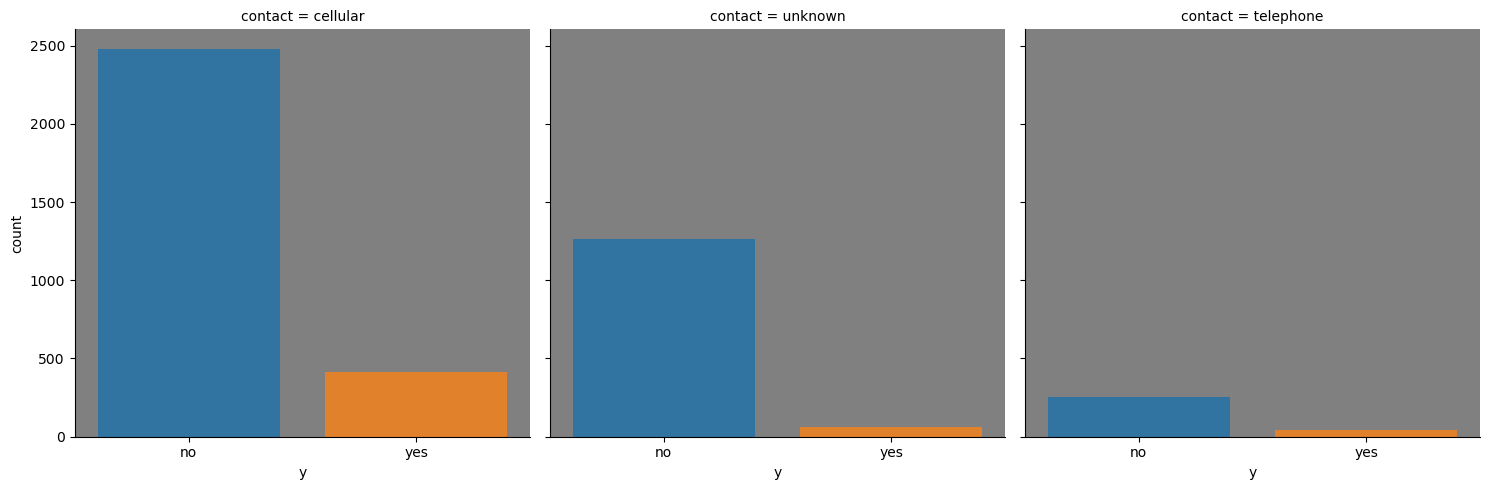

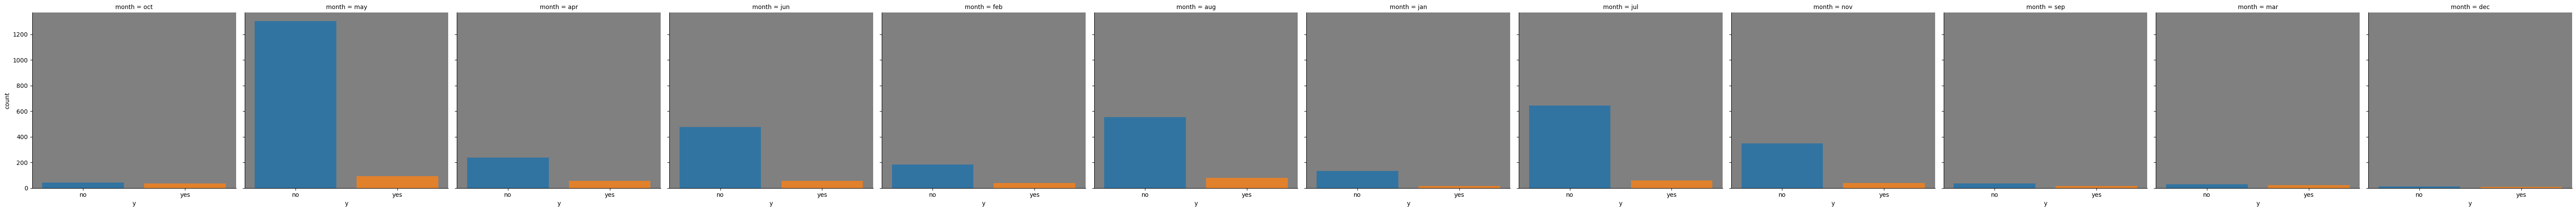

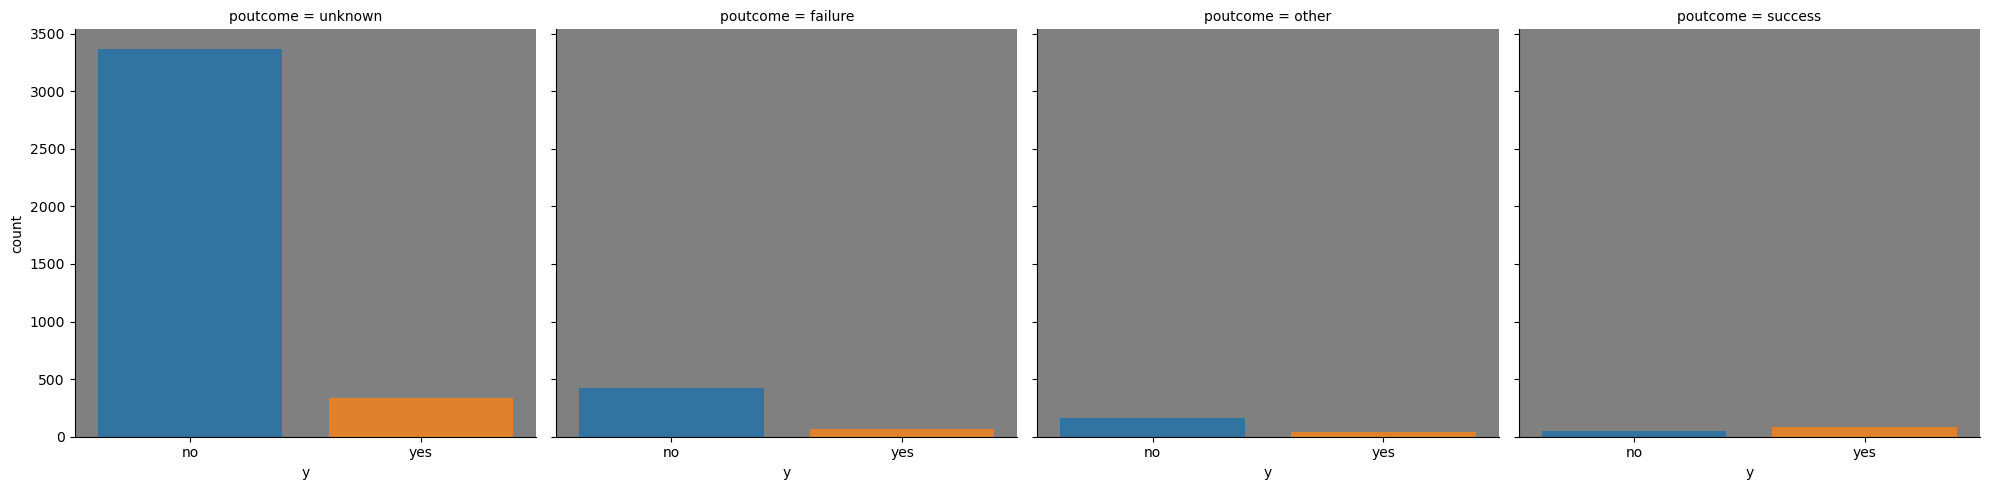

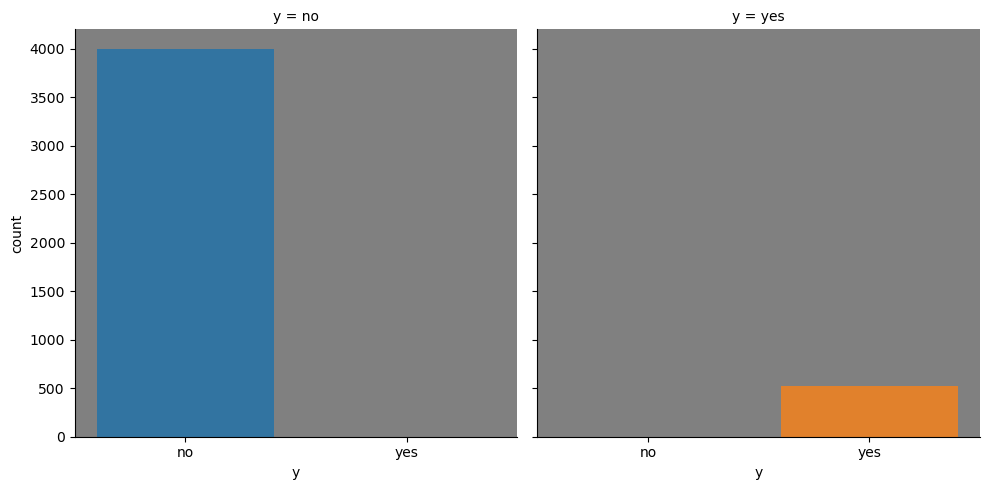

In [378]:
for categorical_feature in categorical_features:
    sns.catplot(x='y', col=categorical_feature, kind='count', data= df)
plt.show()

In [380]:
for categorical_feature in categorical_features:
    print(df.groupby(['y',categorical_feature]).size())

y    job          
no   admin.           420
     blue-collar      877
     entrepreneur     153
     housemaid         98
     management       838
     retired          176
     self-employed    163
     services         379
     student           65
     technician       685
     unemployed       115
     unknown           31
yes  admin.            58
     blue-collar       69
     entrepreneur      15
     housemaid         14
     management       131
     retired           54
     self-employed     20
     services          38
     student           19
     technician        83
     unemployed        13
     unknown            7
dtype: int64
y    marital 
no   divorced     451
     married     2520
     single      1029
yes  divorced      77
     married      277
     single       167
dtype: int64
y    education
no   primary       614
     secondary    2061
     tertiary     1157
     unknown       168
yes  primary        64
     secondary     245
     tertiary      193
     unkn

In [381]:
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['deposit']))]
print('Number of numerical variables: ', len(numerical_features))
df[numerical_features].head()


Number of numerical variables:  7


age  balance  day  duration  campaign  pdays  previous
0   30     1787   19        79         1     -1         0
1   33     4789   11       220         1    339         4
2   35     1350   16       185         1    330         1
3   30     1476    3       199         4     -1         0
4   59        0    5       226         1     -1         0

In [382]:
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 1


In [383]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_feature+['deposit']]
print("Continuous feature Count {}".format(len(continuous_features)))

Continuous feature Count 6


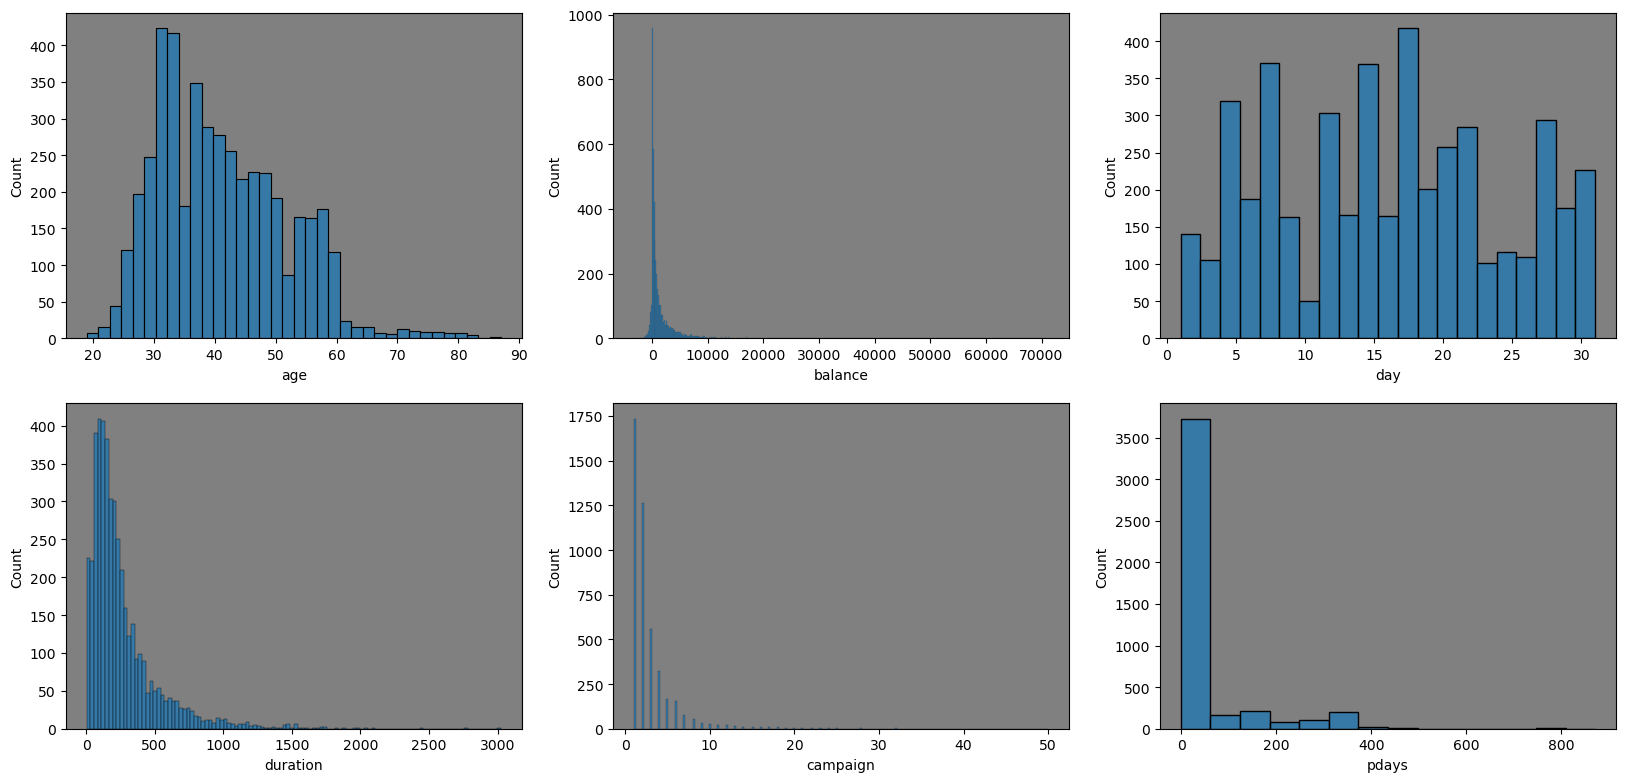

In [449]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for continuous_feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.histplot(df[continuous_feature])
    plt.xlabel(continuous_feature)
    plotnumber+=1
plt.show()

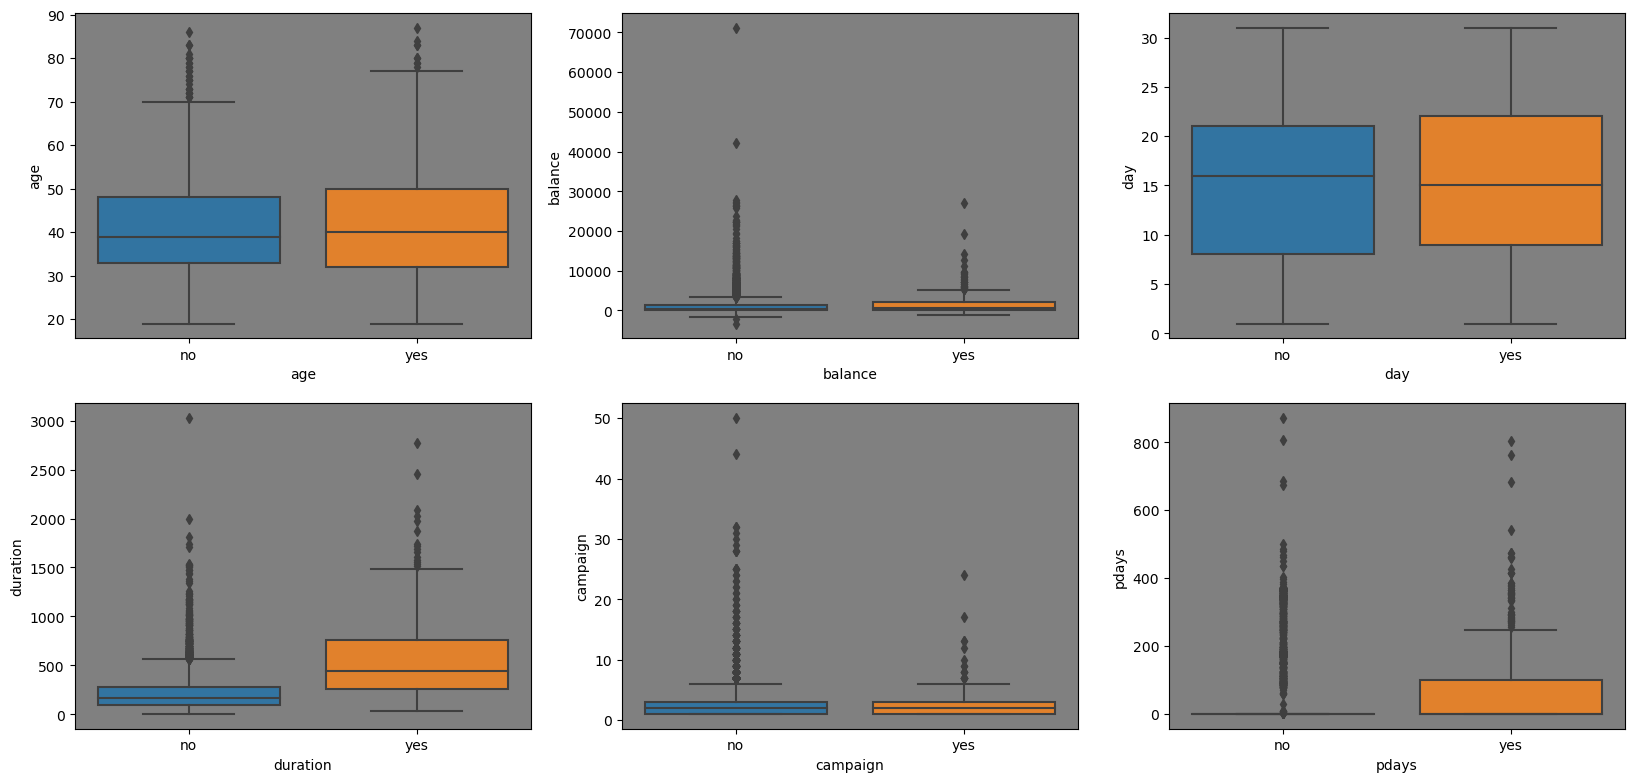

In [394]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in continuous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="y", y= df[feature], data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

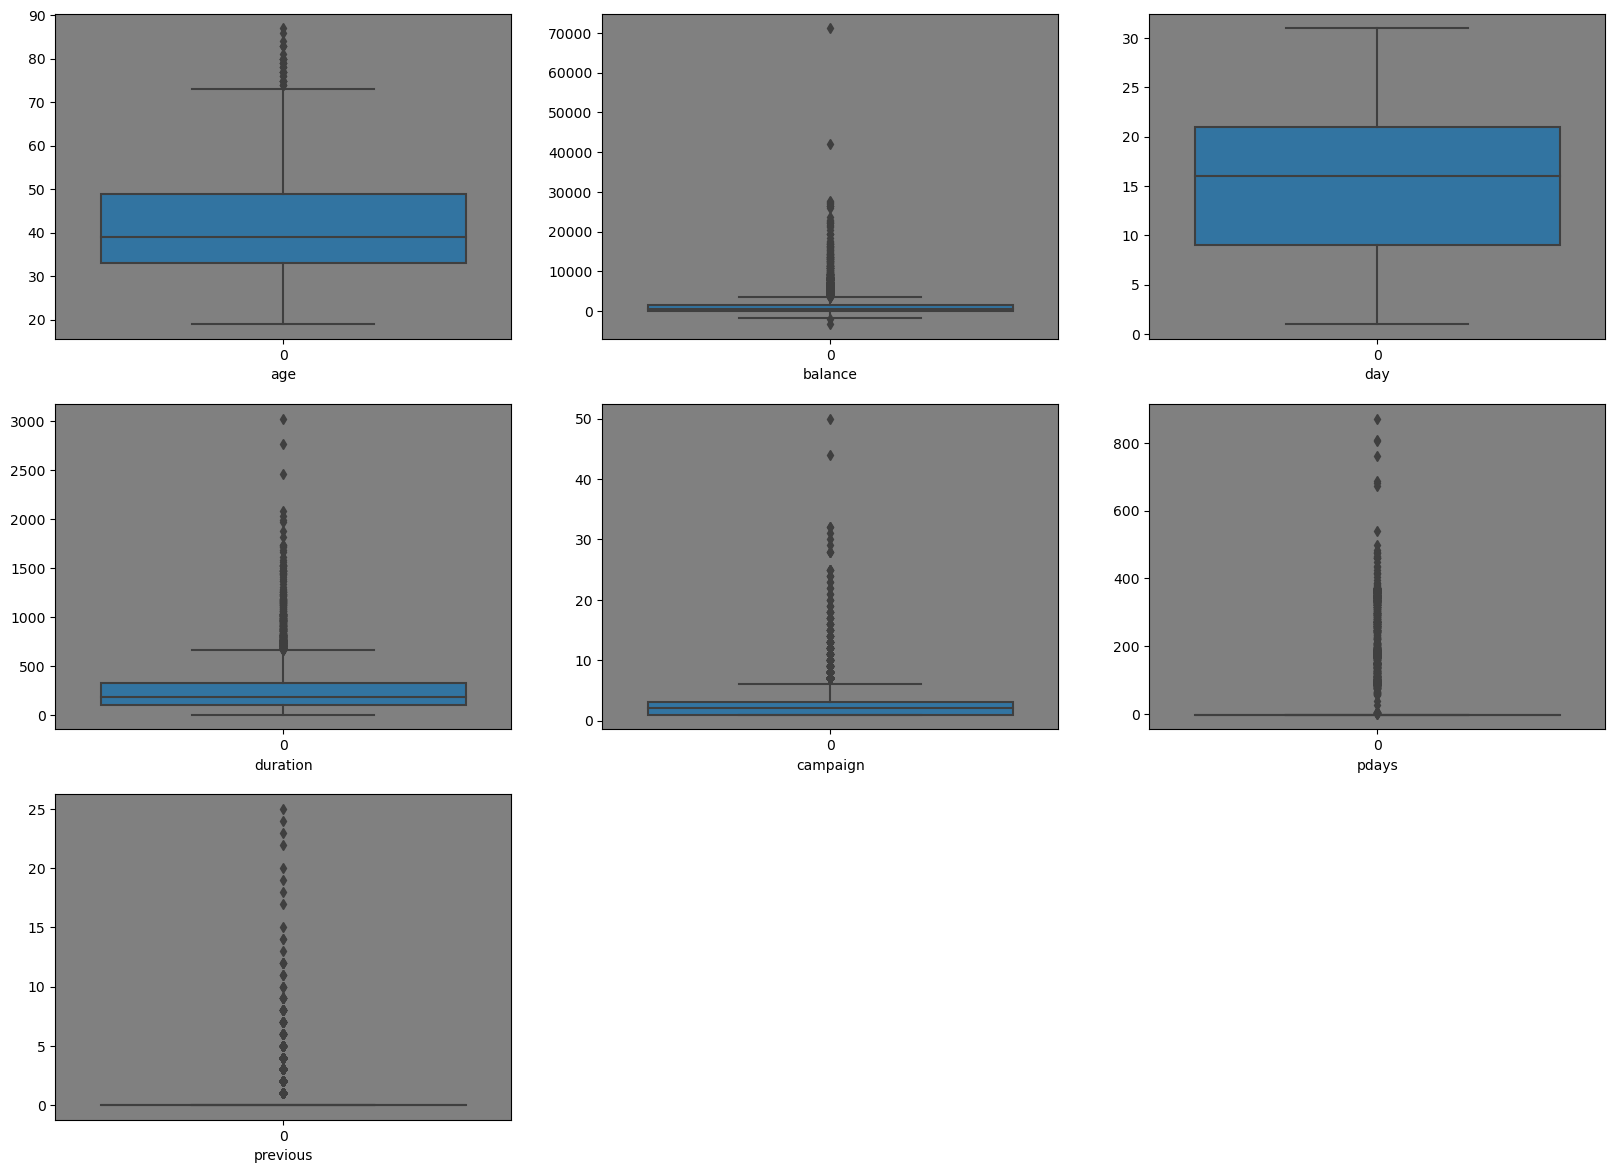

In [395]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

C:\Users\sande\AppData\Local\Temp\ipykernel_7012\3771475982.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_mat=df.corr()


<Axes: >

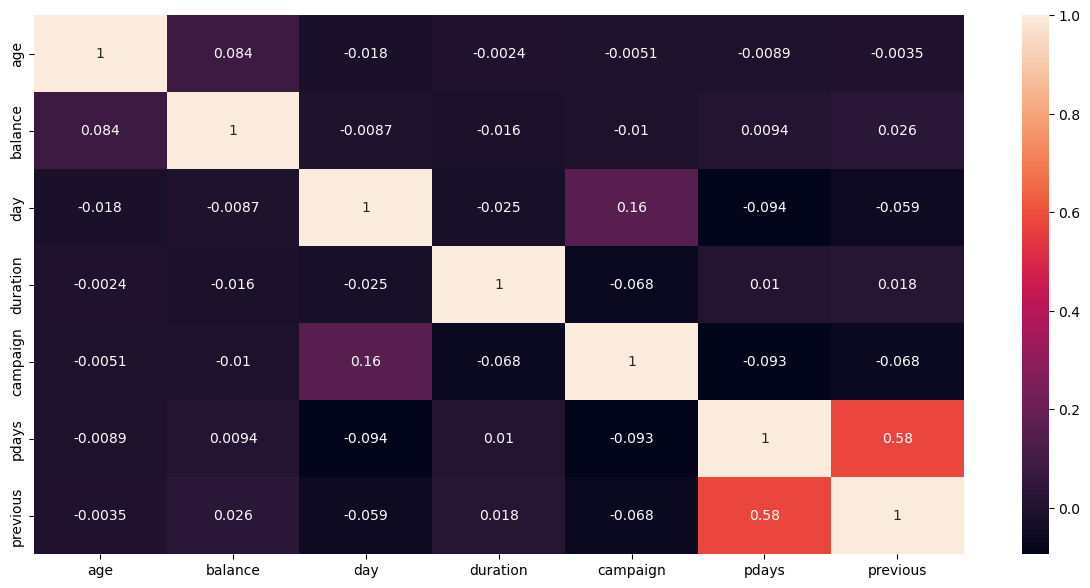

In [396]:
cor_mat=df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

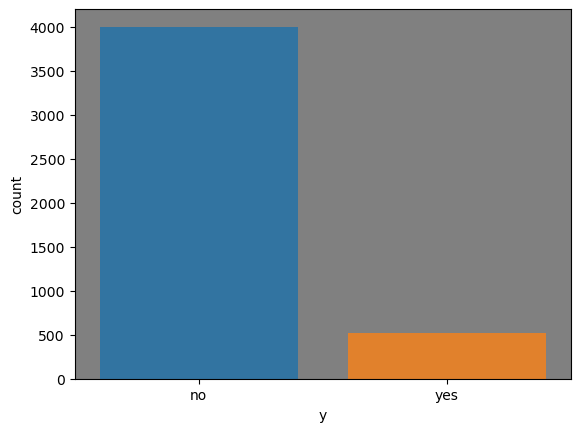

In [398]:
sns.countplot(x='y',data=df)
plt.show()

In [399]:
df['y'].groupby(df['y']).count()

y
no     4000
yes     521
Name: y, dtype: int64

In [400]:
df2=df.copy()

In [401]:
df2.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

In [402]:
df2.shape

(4521, 17)

In [404]:
df2.groupby(['y','default']).size()

y    default
no   no         3933
     yes          67
yes  no          512
     yes           9
dtype: int64

In [405]:
df2.drop(['default'],axis=1, inplace=True)

In [407]:
df2.groupby(['y','pdays']).size()

y    pdays
no   -1       3368
      2          7
      3          1
      5          1
      7          3
              ... 
yes   474        2
      541        1
      683        1
      761        1
      804        1
Length: 371, dtype: int64

In [408]:
df2.drop(['pdays'],axis=1, inplace=True)

In [409]:
df2.groupby('age',sort=True)['age'].count()

age
19     4
20     3
21     7
22     9
23    20
      ..
81     1
83     4
84     1
86     1
87     1
Name: age, Length: 67, dtype: int64

In [412]:
df2.groupby(['y','balance'],sort=True)['balance'].count()

y    balance
no   -3313      1
     -2082      1
     -1746      1
     -1680      1
     -1400      1
               ..
yes   11262     1
      12569     1
      14220     1
      19317     1
      26965     1
Name: balance, Length: 2604, dtype: int64

In [414]:
df2.groupby(['y','duration'],sort=True)['duration'].count()

y    duration
no   4           1
     5           9
     6           2
     7           6
     8           9
                ..
yes  1971        1
     2029        1
     2087        1
     2456        1
     2769        1
Name: duration, Length: 1149, dtype: int64

In [416]:
 df2.groupby(['y','campaign'],sort=True)['campaign'].count()

y    campaign
no   1           1494
     2           1126
     3            501
     4            282
     5            158
     6            139
     7             69
     8             52
     9             28
     10            26
     11            22
     12            20
     13            15
     14            10
     15             9
     16             8
     17             6
     18             7
     19             3
     20             3
     21             2
     22             2
     23             2
     24             2
     25             4
     28             3
     29             1
     30             1
     31             1
     32             2
     44             1
     50             1
yes  1            240
     2            138
     3             57
     4             43
     5              9
     6             16
     7              6
     8              4
     9              2
     10             1
     12             1
     13             2
     17           

In [417]:
df3 = df2[df2['campaign'] < 33]

In [419]:
df3.groupby(['y','campaign'],sort=True)['campaign'].count()

y    campaign
no   1           1494
     2           1126
     3            501
     4            282
     5            158
     6            139
     7             69
     8             52
     9             28
     10            26
     11            22
     12            20
     13            15
     14            10
     15             9
     16             8
     17             6
     18             7
     19             3
     20             3
     21             2
     22             2
     23             2
     24             2
     25             4
     28             3
     29             1
     30             1
     31             1
     32             2
yes  1            240
     2            138
     3             57
     4             43
     5              9
     6             16
     7              6
     8              4
     9              2
     10             1
     12             1
     13             2
     17             1
     24             1
Name: campaign, dt

In [421]:
df3.groupby(['y','previous'],sort=True)['previous'].count()

y    previous
no   0           3366
     1            235
     2            143
     3             91
     4             53
     5             34
     6             16
     7             19
     8             15
     9              7
     10             2
     11             3
     12             4
     13             1
     15             1
     17             1
     18             1
     19             1
     20             1
     22             1
     23             1
     24             1
     25             1
yes  0            337
     1             51
     2             50
     3             22
     4             25
     5             13
     6              9
     7              3
     8              3
     9              3
     10             2
     12             1
     14             2
Name: previous, dtype: int64

In [422]:
df4 = df3[df3['previous'] < 31]

In [423]:
cat_columns = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
for col in  cat_columns:
    df4 = pd.concat([df4.drop(col, axis=1),pd.get_dummies(df4[col], prefix=col, prefix_sep='_',drop_first=True, dummy_na=False)], axis=1)

In [468]:
df4 = pd.get_dummies(df4)

In [469]:
df4.head()

age  balance  day  duration  campaign  previous  job_blue-collar  \
0   30     1787   19        79         1         0                0   
1   33     4789   11       220         1         4                0   
2   35     1350   16       185         1         1                0   
3   30     1476    3       199         4         0                0   
4   59        0    5       226         1         0                1   

   job_entrepreneur  job_housemaid  job_management  ...  month_nov  month_oct  \
0                 0              0               0  ...          0          1   
1                 0              0               0  ...          0          0   
2                 0              0               1  ...          0          0   
3                 0              0               1  ...          0          0   
4                 0              0               0  ...          0          0   

   month_sep  poutcome_other  poutcome_success  poutcome_unknown  housing_new  \
0          0               0                 0                 1            0   
1          0               0                 0                 0            1   
2          0               0                 0                 0            1   
3          0               0                 0                 1            1   
4          0               0                 0                 1            1   

   loan_new  y_no  y_yes  
0         0     1      0  
1         1     1      0  
2         0     1      0  
3         1     1      0  
4         0     1      0  

[5 rows x 42 columns]

In [427]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
clf = ExtraTreesClassifier(n_estimators=100)
clf = clf.fit(X.values, y)
clf.feature_importances_  
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X.values)

In [428]:
from sklearn.model_selection import train_test_split

In [429]:
X_train,X_test,y_train,y_test=train_test_split(X_new,y,test_size=0.25,stratify=y,random_state=0)

In [496]:
print(X_train)

[[ 0.54075805 -0.51592256  0.83868715 -0.34651978 -0.56885008 -0.17592358]
 [ 0.54075805  0.13606371  0.44738393 -0.00609057 -0.15676538 -0.17592358]
 [ 0.91649075  3.69376793 -1.24826337 -0.81788331 -0.15676538 -0.17592358]
 ...
 [ 0.91649075 -0.54939768  0.57781834  0.41289924 -0.15676538 -0.17592358]
 [ 2.5133547   0.93713103 -0.85696015 -0.4890927  -0.56885008  5.68428633]
 [-1.0561059  -0.29016015 -1.24826337  0.66312926 -0.56885008 -0.17592358]]


In [497]:
print(X_test)

[[-0.21070734 -0.52604295  1.88216242 -0.92554042  1.49157344 -0.17592358]
 [ 0.91649075  0.27424588  0.18651511 -0.61420771 -0.15676538 -0.17592358]
 [-1.24397224  1.28861975 -0.46565693 -0.07883185 -0.56885008  5.68428633]
 ...
 [ 1.01042392  0.43695051  1.6212936  -0.73641307  1.07948874  5.68428633]
 [ 0.91649075 -0.521372    0.96912156  2.68242735  0.66740403 -0.17592358]
 [ 1.38615661  0.2769706  -0.85696015  0.60202658 -0.56885008 -0.17592358]]


In [498]:
print(y_train)

0       0
1       1
2       0
3       0
4       0
       ..
5991    1
5992    1
5993    1
5994    1
5995    1
Name: y_new, Length: 5996, dtype: int64


In [499]:
print(y_test)

4244    0
1746    0
3176    1
3867    0
3355    0
       ..
4480    0
430     0
2583    1
1846    1
2658    0
Name: y_new, Length: 1130, dtype: int64


In [430]:
from imblearn.over_sampling import SMOTE

In [431]:
sm = SMOTE(sampling_strategy='auto', random_state=42)

In [500]:
X_train,y_train=sm.fit_resample(X_train,y_train)

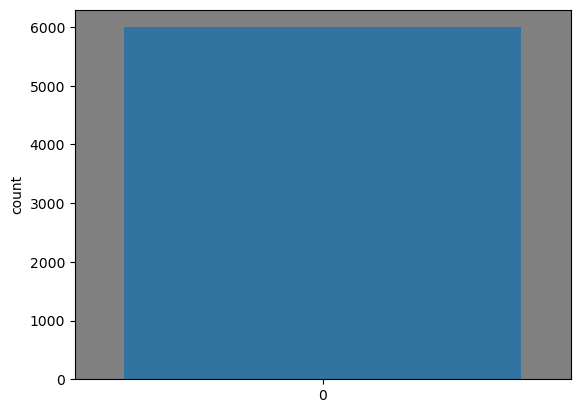

In [453]:
sns.countplot(y_train)
plt.show()

In [502]:
from sklearn.preprocessing import StandardScaler

In [503]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [517]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,f1_score
from sklearn.metrics import classification_report

In [518]:
model_comparison={}

In [529]:
classifier=DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)

[Text(0.43418630100590216, 0.9827586206896551, 'x[3] <= -0.525\ngini = 0.5\nsamples = 5996\nvalue = [2998, 2998]'),
 Text(0.09427551231339948, 0.9482758620689655, 'x[4] <= -0.363\ngini = 0.28\nsamples = 2196\nvalue = [1827, 369]'),
 Text(0.029320444489139178, 0.9137931034482759, 'x[3] <= -0.878\ngini = 0.406\nsamples = 933\nvalue = [669, 264]'),
 Text(0.00715115759363547, 0.8793103448275862, 'x[3] <= -0.907\ngini = 0.071\nsamples = 216\nvalue = [208, 8]'),
 Text(0.004290694556181282, 0.8448275862068966, 'x[0] <= -1.103\ngini = 0.022\nsamples = 178\nvalue = [176, 2]'),
 Text(0.002860463037454188, 0.8103448275862069, 'x[1] <= -0.218\ngini = 0.219\nsamples = 16\nvalue = [14, 2]'),
 Text(0.001430231518727094, 0.7758620689655172, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.004290694556181282, 0.7758620689655172, 'x[1] <= 0.276\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.002860463037454188, 0.7413793103448276, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.00572092607

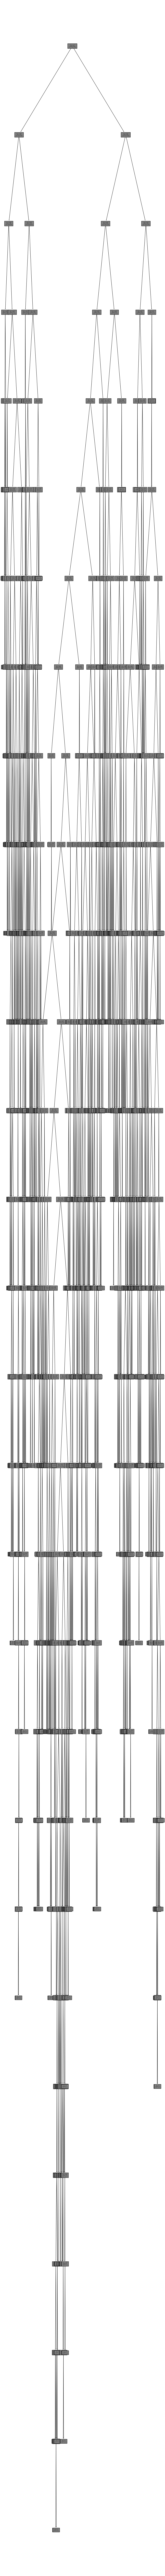

In [564]:
clf = DecisionTreeClassifier() 
clf.fit(X_train, y_train,)
clf.score(X_test, y_test)
plt.figure(figsize=(12,198))
tree.plot_tree(clf,fontsize=3) 

In [527]:
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_3 <= -0.53
|   |--- feature_4 <= -0.36
|   |   |--- feature_3 <= -0.88
|   |   |   |--- feature_3 <= -0.91
|   |   |   |   |--- feature_0 <= -1.10
|   |   |   |   |   |--- feature_1 <= -0.22
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_1 >  -0.22
|   |   |   |   |   |   |--- feature_1 <= 0.28
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_1 >  0.28
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_0 >  -1.10
|   |   |   |   |   |--- class: 0
|   |   |   |--- feature_3 >  -0.91
|   |   |   |   |--- feature_1 <= -0.55
|   |   |   |   |   |--- feature_1 <= -0.56
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_1 >  -0.56
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  -0.55
|   |   |   |   |   |--- class: 0
|   |   |--- feature_3 >  -0.88
|   |   |   |--- feature_1 <= -0.50
|   |   |   |   |--- feature_5 <= 2.75
|   |   |   |   |   |--- feature_1 <= -0.

In [528]:
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5,scoring="recall")
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Decision Tree']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 77.52%
Model F1-Score : 74.58%
Cross Val Accuracy: 86.96 %
Cross Val Standard Deviation: 1.58 %
              precision    recall  f1-score   support

           0       0.81      0.93      0.86       872
           1       0.52      0.26      0.35       258

    accuracy                           0.78      1130
   macro avg       0.66      0.59      0.60      1130
weighted avg       0.74      0.78      0.75      1130



In [507]:
classifier=RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Random Forest']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 81.33%
Model F1-Score : 79.11%
Cross Val Accuracy: 85.54 %
Cross Val Standard Deviation: 0.90 %
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       891
           1       0.61      0.33      0.43       239

    accuracy                           0.81      1130
   macro avg       0.72      0.64      0.66      1130
weighted avg       0.79      0.81      0.79      1130



In [508]:
classifier=GaussianNB()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(f"Model Accuracy : {accuracy_score(y_pred,y_test)*100:.2f}%")
print(f"Model F1-Score : {f1_score(y_pred,y_test,average='weighted')*100:.2f}%")
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
print(classification_report(y_pred,y_test,zero_division=1))
model_comparison['Naive Bayes']=[accuracy_score(y_pred,y_test),f1_score(y_pred,y_test,average='weighted'),(accuracies.mean()),(accuracies.std())]

Model Accuracy : 86.64%
Model F1-Score : 85.60%
Cross Val Accuracy: 70.88 %
Cross Val Standard Deviation: 1.61 %
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       941
           1       0.65      0.44      0.53       189

    accuracy                           0.87      1130
   macro avg       0.77      0.70      0.72      1130
weighted avg       0.85      0.87      0.86      1130



In [509]:
Model_com_df=pd.DataFrame(model_comparison).T
Model_com_df.columns=['Model Accuracy','Model F1-Score','CV Accuracy','CV std']
Model_com_df=Model_com_df.sort_values(by='Model F1-Score',ascending=False)
Model_com_df.style.format("{:.2%}").background_gradient(cmap='Blues')

In [510]:
Model_com_df.style.highlight_max().set_caption("Maximum Score in each Column").format("{:.2%}")

In [511]:
Model_com_df.style.highlight_min().set_caption("Minimum Score in each Column").format("{:.2%}")

In [512]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,classifier.predict(X_test))
cm

array([[895, 105],
       [ 46,  84]], dtype=int64)

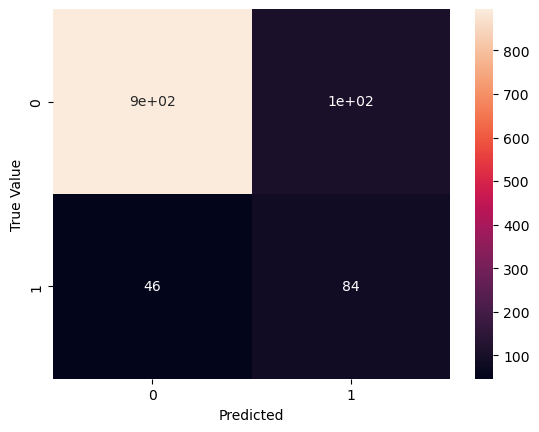

In [513]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()